In [2]:
# FRESH START WITH BPT/WHAN AND PRODUCING NEW FIGURES

import csv
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib as mpl
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

from AGN_reg_note import *
from __legpars__ import *

gama_file = r"E:\rabbit_hole\Oleg_GAMA_belowMS.txt"

In [3]:
#some fancy functions

def changer(element):
    if element == '""':
        return -99999.0
    else:
        return float(element)
    
def ew_proc(HA_ew, HA_ew_err):
    pair_HA = []
    HA_ew_or = HA_ew
    SN = 2
    if HA_ew == -99999.0 or HA_ew_err < 0:
        return -99999.0, -99999.0, pair_HA
    else:
        if HA_ew > 0 and HA_ew < SN*HA_ew_err:
            pair_HA = ['down']
            HA_ew += SN*HA_ew_err
        elif HA_ew < 0 and HA_ew + SN*HA_ew_err <= 0:
            pair_HA = ['down']
            HA_ew = SN*HA_ew_err
        elif HA_ew < 0 and HA_ew + SN*HA_ew_err > 0:
            pair_HA = ['down']
            HA_ew += SN*HA_ew_err
        elif HA_ew > 0 and HA_ew >= SN*HA_ew_err:
            pair_HA = []
        else:
            print("Forgot me!")
        
    return math.log(HA_ew, 10), HA_ew_err, pair_HA

def SFR(HA, HA_er, z):
        if HA == -99999.0 or HA_er < 0: 
            return -99.9, -99.9
        
        cosmo = FlatLambdaCDM(H0=75 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)
        d_mpc = float(str(cosmo.luminosity_distance(z)).split(' ')[0])

        if HA + 2*HA_er > 0 and HA < 2*HA_er:
            HA += 2*HA_er
            SFR = (7.52*10**(-10)*4*np.pi*(d_mpc**2)*HA/(1+z))
            SFR_er = '-'
            return SFR, SFR_er
        elif HA > 2*HA_er:
            SFR = (7.52*10**(-10)*4*np.pi*(d_mpc**2)*HA/(1+z))
            SFR_er = SFR*(HA_er/HA)
            return SFR, SFR_er
        else:
            return -99.9, -99.9

In [4]:
#pars_initializing

with open(gama_file, 'r') as f:
    lines = f.readlines()
    stripped_lines = [item.strip() for item in lines]

    SURV = []
    IS_BEST = []
    IS_SBEST = []
    CATAID = []
    Z = []
    MS_16 = []
    MS = []
    MS_84 = []
    TC_16 = []
    TC = []
    TC_84 = []
    TW_16 = []
    TW = []
    TW_84 = []
    MD_16 = []
    MD = []
    MD_84 = []
    age_16 = []
    age = []
    age_84 = []
    SFR_16 = []
    SFR_50 = []
    SFR_84 = []
    SFR_HA = []
    SFR_HA_er = []
    P100 = []
    P100_er = []
    HA = []
    HA_er = []
    HB = []  # should I include errors of HA and HB
    HB_er = []
    OIII = []
    OIII_er = []  # OIIIB, 5007
    NII = []
    NII_er = [] # NIIB, 6583
    HA_EW = []
    HA_EW_ERR = []
    BPT = []
    WHAN = []
    SII = []
    SII_er = []
    OI = []
    OI_er = []
    OII = []
    OII_er = []
    BMS = []

for line in stripped_lines:
    data = line.split()
    if data[742] == 'true' and data[743] == 'true' and (data[740] == 'GAMA' or data[740] == 'SDSS'):
    #pars required
        CATAID.append(changer(data[0]))
        Z.append(changer(data[1]))
        MS_16.append(changer(data[34]))
        MS.append(changer(data[35]))
        MS_84.append(changer(data[36]))

        TC_16.append(changer(data[46]))
        TC.append(changer(data[47]))
        TC_84.append(changer(data[48]))

        TW_16.append(changer(data[52]))
        TW.append(changer(data[53]))
        TW_84.append(changer(data[54]))

        MD_16.append(changer(data[88]))
        MD.append(changer(data[89]))
        MD_84.append(changer(data[90]))

        age_16.append(changer(data[124]))
        age.append(changer(data[125]))
        age_84.append(changer(data[126]))

        P100.append(changer(data[724]))
        P100_er.append(changer(data[725]))

        HA.append(changer(data[816]))
        HA_er.append(changer(data[815]))
        HB.append(changer(data[916]))  # should I include errors of HA and HB
        HB_er.append(changer(data[915]))
        OIII.append(changer(data[901]))
        OIII_er.append(changer(data[900]))  # OIIIB, 5007
        NII.append(changer(data[806]))
        NII_er.append(changer(data[805]))  # NIIR, 6583
        HA_EW.append(changer(data[814]))
        HA_EW_ERR.append(changer(data[813]))

        SII.append(changer(data[801]))
        SII_er.append(changer(data[800]))
        OI.append(changer(data[831]))
        OI_er.append(changer(data[830]))
        OII.append(changer(data[1001]))
        OII_er.append(changer(data[1000]))

        SURV.append(data[740])
        IS_BEST.append(data[742])
        IS_SBEST.append(data[743])

        BMS.append(changer(data[-1]))

        SFR_50.append(changer(data[145]))
        SFR_16.append(changer(data[144]))
        SFR_84.append(changer(data[146]))

#no need in dust correction for BPT, this is what BPT is about (CLOUDY example)


In [6]:
#preparations before plotting

color_dict = color_dict_BPT
cd_WHAN = cd_WHAN


def plotting_arrows(ax, dict, x, y, pair_x_flags, pair_y_flags, mode, m_x, m_y, alpha):

        try:
            pair_x_flag = pair_x_flags[0]
        except:
            pair_x_flag = ''

        try:
            pair_y_flag = pair_y_flags[0]
        except:
            pair_y_flag = ''

        if pair_x_flag == 'down':
            pair_x_flag = 'left'
        elif pair_x_flag == 'up':
            pair_x_flag = 'right'

        coord_dict = {
            'down' : [0, m_y*(-0.07)],
            'left' : [m_x*(-0.07), 0],
            'up' : [0, m_y*(0.07)],
            'right' : [m_x*(0.07), 0]
        }
        try:
            ax.arrow(x, y, coord_dict[pair_x_flag][0], coord_dict[pair_x_flag][1], head_width=0.03,
            head_length=0.03, color=dict[mode][0], alpha=alpha)
        except:
            pass

        try:
            ax.arrow(x, y, coord_dict[pair_y_flag][0], coord_dict[pair_y_flag][1], head_width=0.03,
            head_length=0.03, color=dict[mode][0], alpha=alpha)
        except:
            pass


def plotter_BPT(ax, x, y, pair_x_flags, pair_y_flags, AGN, dict, radio_flag, alpha):
    if len(pair_x_flags) == 0 and len(pair_y_flags) == 0:
        ax.scatter(x, y, s=1.5, color=dict[AGN][0], alpha=alpha)
    else:
        plotting_arrows(ax, dict, x, y, pair_x_flags, pair_y_flags, AGN, m_x = 1, m_y = 1, alpha=alpha)
    
    if radio_flag:
        ax.scatter(x, y, s=10, color='k', alpha=1)


def plotter_MEx(ax, x, y, pair_y_flags, AGN):
    if len(pair_y_flags) == 0:
        ax.scatter(x, y, s=1.5, color=color_dict[AGN][0], alpha=1)
    else:
        plotting_arrows(ax, color_dict, x, y, [], pair_y_flags, AGN, m_x = 1, m_y = 1)

C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_10700\1150640668.py:76: UserWarning: loadtxt: input contained no data: "radio_sources.txt"
  radio_arr = np.loadtxt('radio_sources.txt')


TypeError: unsupported operand type(s) for -: 'float' and 'str'

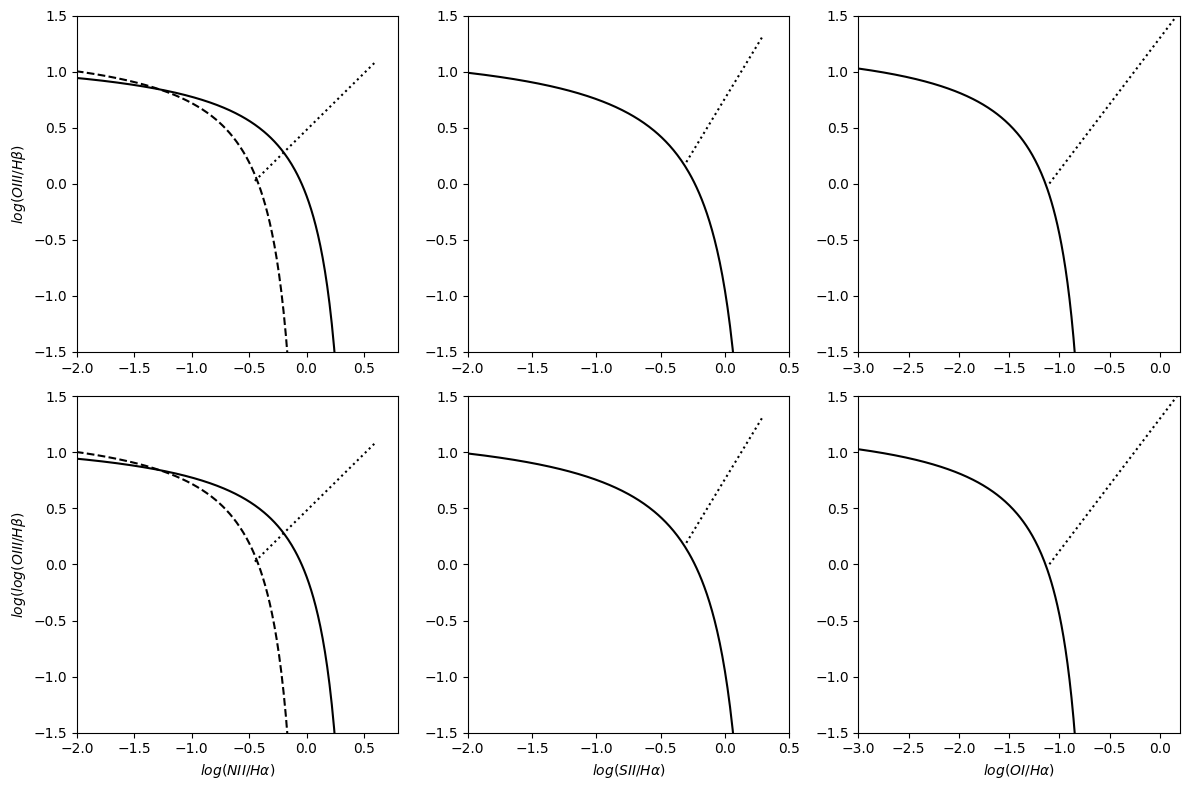

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8), tight_layout=True)
plt.subplots_adjust(wspace=0, hspace=0)

Y = []
PAIRS_Y = []
FLAGS = []


#BPT standart 
ax1 = axs[0, 0]
ax1.set_xlim(-2, 0.8)
ax1.set_ylim(-1.5, 1.5)
X_1 = np.arange(-4, 0.4, 0.01)
X_111 = np.arange(-4, 0, 0.01)
X_11 = np.arange(-0.45, 0.6, 0.01)
ax1.plot(X_1, (0.61/(X_1 - 0.47)) + 1.19,
                      c='k')  # Kewley, 2001
ax1.plot(X_111, (0.61/(X_111 - 0.05)) + 1.3,
                      c='k', linestyle='dashed')  # Kauffman, 2003
            # https://adsabs.harvard.edu/full/2003MNRAS.346.1055K
ax1.plot(X_11, 1.01*X_11 + 0.48, c='k', linestyle='dotted')
ax1.set_ylabel(r'$log(OIII/H\beta)$')

ax2 = axs[1, 0]
ax2.set_xlim(-2, 0.8)
ax2.set_ylim(-1.5, 1.5)
X_1 = np.arange(-4, 0.4, 0.01)
X_111 = np.arange(-4, 0, 0.01)
X_11 = np.arange(-0.45, 0.6, 0.01)
ax2.plot(X_1, (0.61/(X_1 - 0.47)) + 1.19,
                      c='k')  # Kewley, 2001
ax2.plot(X_111, (0.61/(X_111 - 0.05)) + 1.3,
                      c='k', linestyle='dashed')  # Kauffman, 2003
            # https://adsabs.harvard.edu/full/2003MNRAS.346.1055K
ax2.plot(X_11, 1.01*X_11 + 0.48, c='k', linestyle='dotted')
ax2.set_xlabel(r'$log(NII/H\alpha)$')
ax2.set_ylabel(r'$log(log(OIII/H\beta)$')

#SII
ax3 = axs[0, 1]
ax3.set_xlim(-2, 0.5)
ax3.set_ylim(-1.5, 1.5)
X = np.arange(-2, 0.31, 0.01)
X_1 = np.arange(-0.3, 0.31, 0.01)
ax3.plot(X, 0.72/(X - 0.32) + 1.3, c = 'k')
ax3.plot(X_1, 1.89*X_1 + 0.76, c = 'k', linestyle='dotted')

ax4 = axs[1, 1]
ax4.set_xlim(-2, 0.5)
ax4.set_ylim(-1.5, 1.5)
X = np.arange(-2, 0.31, 0.01)
X_1 = np.arange(-0.3, 0.31, 0.01)
ax4.plot(X, 0.72/(X - 0.32) + 1.3, c = 'k')
ax4.plot(X_1, 1.89*X_1 + 0.76, c = 'k', linestyle='dotted')
ax4.set_xlabel(r'$log(SII/H\alpha)$')


#OI
ax5 = axs[0, 2]
ax5.set_xlim(-3, 0.2)
ax5.set_ylim(-1.5, 1.5)
X = np.arange(-3, -0.6, 0.01)
X_1 = np.arange(-1.1, 0.31, 0.01)
ax5.plot(X, 0.73/(X + 0.59) + 1.33, c = 'k')
ax5.plot(X_1, 1.18*X_1 + 1.3, c = 'k', linestyle='dotted')

ax6 = axs[1, 2]
ax6.set_xlim(-3, 0.2)
ax6.set_ylim(-1.5, 1.5)
X = np.arange(-3, -0.6, 0.01)
X_1 = np.arange(-1.1, 0.31, 0.01)
ax6.plot(X, 0.73/(X + 0.59) + 1.33, c = 'k')
ax6.plot(X_1, 1.18*X_1 + 1.3, c = 'k', linestyle='dotted')
ax6.set_xlabel(r'$log(OI/H\alpha)$')

radio_arr = np.loadtxt('radio_sources.txt')
radio_dict = {}

k = 0 
for i in range(len(CATAID)):
    if IS_BEST[i] == 'true' and IS_SBEST[i] == 'true' and (SURV[i] == 'SDSS' or SURV[i] == 'GAMA'):
        k += 1
        ha_ew, ha_ew_err, pair_HA = ew_proc(HA_EW[i], HA_EW_ERR[i])
        AGN, x, X_er, pair_x_flag, y, Y_er, pair_y_flag, SC_WHAN, x_S, x_S_er, pair_x_S_flag, x_O, x_O_er, pair_x_O_flag, y_OII, y_er_OII, pair_y_OII = AGN_reg(OIII[i], OIII_er[i], HB[i], HB_er[i], NII[i], NII_er[i], HA[i], HA_er[i], ha_ew, ha_ew_err, pair_HA, SII[i], SII_er[i], OI[i], OI_er[i], OII[i], OII_er[i])

        Y.append(y)
        PAIRS_Y.append(pair_y_flag)
        FLAGS.append(AGN)

        radio_flag = False
        if CATAID[i] in radio_arr:
            radio_dict.update({CATAID[i] : [SC_WHAN, AGN]})
            radio_flag = True

        plotter_BPT(ax1, x, y, pair_x_flag, pair_y_flag, AGN, color_dict, radio_flag, alpha=0.6)
        plotter_BPT(ax2, x, y, pair_x_flag, pair_y_flag, SC_WHAN, cd_WHAN, radio_flag, alpha=0.6)
        plotter_BPT(ax3, x_S, y, pair_x_S_flag, pair_y_flag, AGN, color_dict, radio_flag, alpha=0.6)
        plotter_BPT(ax4, x_S, y, pair_x_S_flag, pair_y_flag, SC_WHAN, cd_WHAN, radio_flag, alpha=0.6)
        plotter_BPT(ax5, x_O, y, pair_x_O_flag, pair_y_flag, AGN, color_dict, radio_flag, alpha=0.6)
        plotter_BPT(ax6, x_O, y, pair_x_O_flag, pair_y_flag, SC_WHAN, cd_WHAN, radio_flag, alpha=0.6)

plt.savefig('BPT_Michal.pdf')

C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_18092\4090649774.py:60: UserWarning: loadtxt: input contained no data: "radio_sources.txt"
  radio_arr = np.loadtxt('radio_sources.txt')


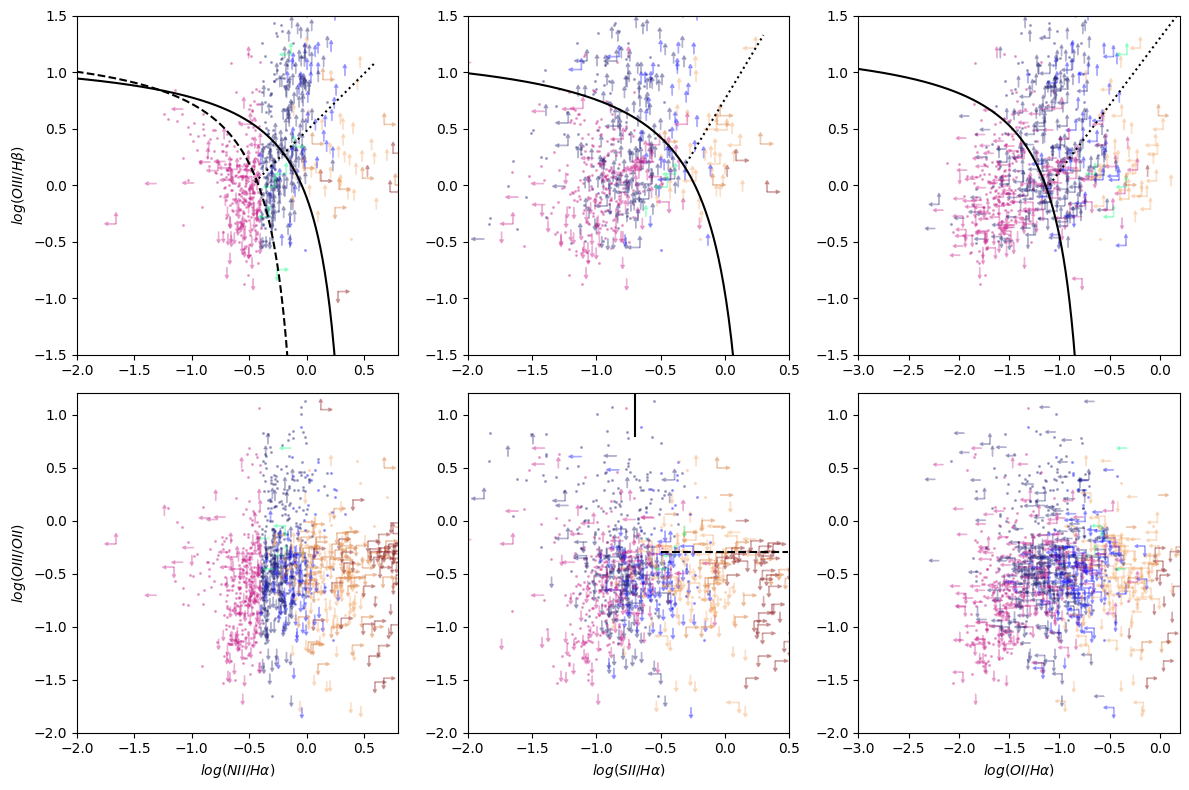

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8), tight_layout=True)
plt.subplots_adjust(wspace=0, hspace=0)

Y = []
PAIRS_Y = []
FLAGS = []
#BPT standart 
ax1 = axs[0, 0]
ax1.set_xlim(-2, 0.8)
ax1.set_ylim(-1.5, 1.5)
X_1 = np.arange(-4, 0.4, 0.01)
X_111 = np.arange(-4, 0, 0.01)
X_11 = np.arange(-0.45, 0.6, 0.01)
ax1.plot(X_1, (0.61/(X_1 - 0.47)) + 1.19,
                      c='k')  # Kewley, 2001
ax1.plot(X_111, (0.61/(X_111 - 0.05)) + 1.3,
                      c='k', linestyle='dashed')  # Kauffman, 2003
            # https://adsabs.harvard.edu/full/2003MNRAS.346.1055K
ax1.plot(X_11, 1.01*X_11 + 0.48, c='k', linestyle='dotted')
ax1.set_ylabel(r'$log(OIII/H\beta)$')

ax2 = axs[1, 0]
ax2.set_xlim(-2, 0.8)
ax2.set_ylim(-2, 1.2)
ax2.set_xlabel(r'$log(NII/H\alpha)$')
ax2.set_ylabel(r'$log(OIII/OII)$')

#SII
ax3 = axs[0, 1]
ax3.set_xlim(-2, 0.5)
ax3.set_ylim(-1.5, 1.5)
X = np.arange(-2, 0.31, 0.01)
X_1 = np.arange(-0.3, 0.31, 0.01)
ax3.plot(X, 0.72/(X - 0.32) + 1.3, c = 'k')
ax3.plot(X_1, 1.89*X_1 + 0.76, c = 'k', linestyle='dotted')

ax4 = axs[1, 1]
ax4.set_xlim(-2, 0.5)
ax4.set_ylim(-2, 1.2)
X = np.arange(-0.5, 0.5, 0.01)
ax4.plot(X, X*0 - 0.3, c = 'k', linestyle='dashed')
ax4.plot([-0.7, -0.7], [0.8, 1.2], c = 'k')
ax4.set_xlabel(r'$log(SII/H\alpha)$')


#OI
ax5 = axs[0, 2]
ax5.set_xlim(-3, 0.2)
ax5.set_ylim(-1.5, 1.5)
X = np.arange(-3, -0.6, 0.01)
X_1 = np.arange(-1.1, 0.31, 0.01)
ax5.plot(X, 0.73/(X + 0.59) + 1.33, c = 'k')
ax5.plot(X_1, 1.18*X_1 + 1.3, c = 'k', linestyle='dotted')

ax6 = axs[1, 2]
ax6.set_xlim(-3, 0.2)
ax6.set_ylim(-2, 1.2)
ax6.set_xlabel(r'$log(OI/H\alpha)$')

radio_arr = np.loadtxt('radio_sources.txt')
radio_dict = {}

k = 0 
for i in range(len(CATAID)):
    if IS_BEST[i] == 'true' and IS_SBEST[i] == 'true' and (SURV[i] == 'SDSS' or SURV[i] == 'GAMA'):
        k += 1
        ha_ew, ha_ew_err, pair_HA = ew_proc(HA_EW[i], HA_EW_ERR[i])
        AGN, x, X_er, pair_x_flag, y, Y_er, pair_y_flag, SC_WHAN, x_S, x_S_er, pair_x_S_flag, x_O, x_O_er, pair_x_O_flag, y_OII, y_er_OII, pair_y_OII = AGN_reg(OIII[i], OIII_er[i], HB[i], HB_er[i], NII[i], NII_er[i], HA[i], HA_er[i], ha_ew, ha_ew_err, pair_HA, SII[i], SII_er[i], OI[i], OI_er[i], OII[i], OII_er[i])

        Y.append(y)
        PAIRS_Y.append(pair_y_flag)
        FLAGS.append(AGN)

        radio_flag = False
        if CATAID[i] in radio_arr:
            radio_dict.update({CATAID[i] : [SC_WHAN, AGN]})
            radio_flag = True

        plotter_BPT(ax1, x, y, pair_x_flag, pair_y_flag, SC_WHAN, cd_WHAN, radio_flag, alpha=0.3)
        plotter_BPT(ax2, x, y_OII, pair_x_flag, pair_y_OII, SC_WHAN, cd_WHAN, radio_flag, alpha=0.3)
        plotter_BPT(ax3, x_S, y, pair_x_S_flag, pair_y_flag, SC_WHAN, cd_WHAN, radio_flag, alpha=0.3)
        plotter_BPT(ax4, x_S, y_OII, pair_x_S_flag, pair_y_OII, SC_WHAN, cd_WHAN, radio_flag, alpha=0.3)
        plotter_BPT(ax5, x_O, y, pair_x_O_flag, pair_y_flag, SC_WHAN, cd_WHAN, radio_flag, alpha=0.3)
        plotter_BPT(ax6, x_O, y_OII, pair_x_O_flag, pair_y_OII, SC_WHAN, cd_WHAN, radio_flag, alpha=0.3)

C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_18092\1542790891.py:60: UserWarning: loadtxt: input contained no data: "radio_sources.txt"
  radio_arr = np.loadtxt('radio_sources.txt')


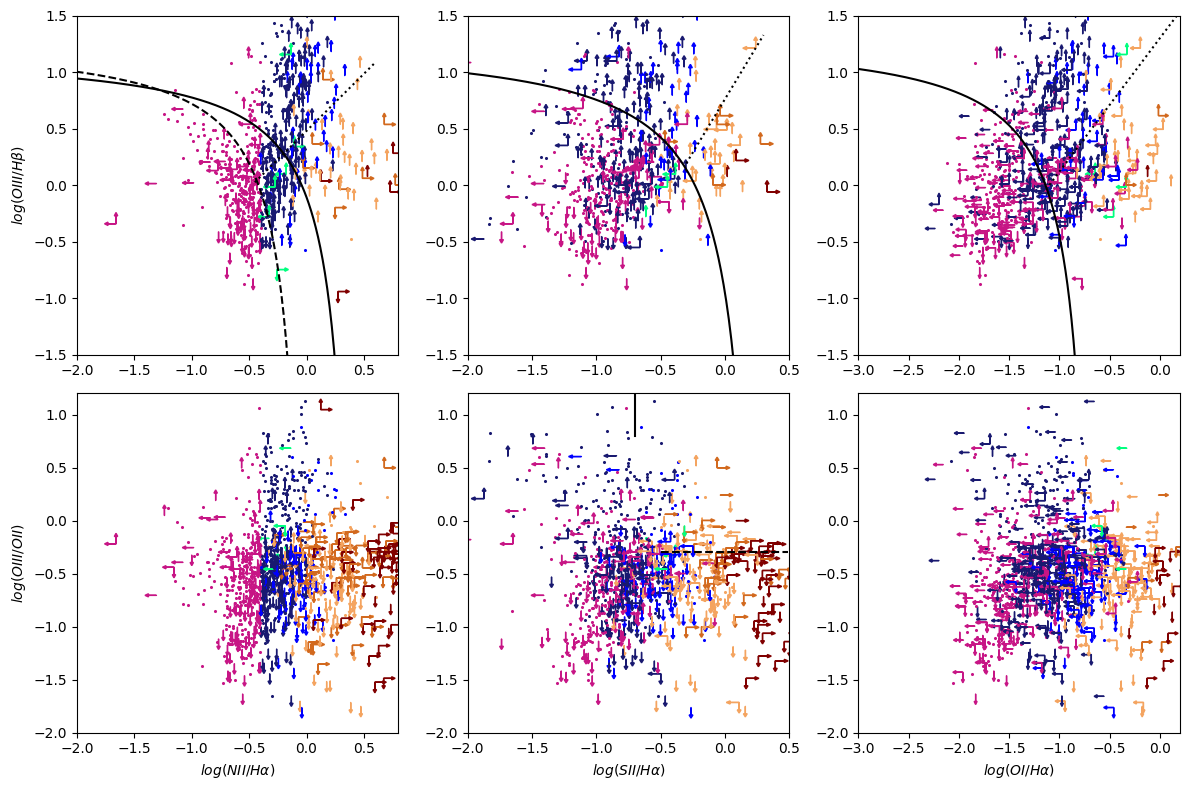

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8), tight_layout=True)
plt.subplots_adjust(wspace=0, hspace=0)

Y = []
PAIRS_Y = []
FLAGS = []
# BPT standart
ax1 = axs[0, 0]
ax1.set_xlim(-2, 0.8)
ax1.set_ylim(-1.5, 1.5)
X_1 = np.arange(-4, 0.4, 0.01)
X_111 = np.arange(-4, 0, 0.01)
X_11 = np.arange(-0.45, 0.6, 0.01)
ax1.plot(X_1, (0.61/(X_1 - 0.47)) + 1.19,
         c='k')  # Kewley, 2001
ax1.plot(X_111, (0.61/(X_111 - 0.05)) + 1.3,
         c='k', linestyle='dashed')  # Kauffman, 2003
# https://adsabs.harvard.edu/full/2003MNRAS.346.1055K
ax1.plot(X_11, 1.01*X_11 + 0.48, c='k', linestyle='dotted')
ax1.set_ylabel(r'$log(OIII/H\beta)$')

ax2 = axs[1, 0]
ax2.set_xlim(-2, 0.8)
ax2.set_ylim(-2, 1.2)
ax2.set_xlabel(r'$log(NII/H\alpha)$')
ax2.set_ylabel(r'$log(OIII/OII)$')

# SII
ax3 = axs[0, 1]
ax3.set_xlim(-2, 0.5)
ax3.set_ylim(-1.5, 1.5)
X = np.arange(-2, 0.31, 0.01)
X_1 = np.arange(-0.3, 0.31, 0.01)
ax3.plot(X, 0.72/(X - 0.32) + 1.3, c='k')
ax3.plot(X_1, 1.89*X_1 + 0.76, c='k', linestyle='dotted')

ax4 = axs[1, 1]
ax4.set_xlim(-2, 0.5)
ax4.set_ylim(-2, 1.2)
X = np.arange(-0.5, 0.5, 0.01)
ax4.plot(X, X*0 - 0.3, c='k', linestyle='dashed')
ax4.plot([-0.7, -0.7], [0.8, 1.2], c='k')
ax4.set_xlabel(r'$log(SII/H\alpha)$')


# OI
ax5 = axs[0, 2]
ax5.set_xlim(-3, 0.2)
ax5.set_ylim(-1.5, 1.5)
X = np.arange(-3, -0.6, 0.01)
X_1 = np.arange(-1.1, 0.31, 0.01)
ax5.plot(X, 0.73/(X + 0.59) + 1.33, c='k')
ax5.plot(X_1, 1.18*X_1 + 1.3, c='k', linestyle='dotted')

ax6 = axs[1, 2]
ax6.set_xlim(-3, 0.2)
ax6.set_ylim(-2, 1.2)
ax6.set_xlabel(r'$log(OI/H\alpha)$')

radio_arr = np.loadtxt('radio_sources.txt')
radio_dict = {}

k = 0
for i in range(len(CATAID)):
    if IS_BEST[i] == 'true' and IS_SBEST[i] == 'true' and (SURV[i] == 'SDSS' or SURV[i] == 'GAMA'):
        k += 1
        ha_ew, ha_ew_err, pair_HA = ew_proc(HA_EW[i], HA_EW_ERR[i])
        AGN, x, X_er, pair_x_flag, y, Y_er, pair_y_flag, SC_WHAN, x_S, x_S_er, pair_x_S_flag, x_O, x_O_er, pair_x_O_flag, y_OII, y_er_OII, pair_y_OII = AGN_reg(
            OIII[i], OIII_er[i], HB[i], HB_er[i], NII[i], NII_er[i], HA[i], HA_er[i], ha_ew, ha_ew_err, pair_HA, SII[i], SII_er[i], OI[i], OI_er[i], OII[i], OII_er[i])

        radio_flag = False
        alpha = 1

        plotter_BPT(ax1, x, y, pair_x_flag, pair_y_flag,
                    SC_WHAN, cd_WHAN, radio_flag, alpha=alpha)
        plotter_BPT(ax2, x, y_OII, pair_x_flag, pair_y_OII,
                    SC_WHAN, cd_WHAN, radio_flag, alpha=alpha)
        plotter_BPT(ax3, x_S, y, pair_x_S_flag, pair_y_flag,
                    SC_WHAN, cd_WHAN, radio_flag, alpha=alpha)
        plotter_BPT(ax4, x_S, y_OII, pair_x_S_flag, pair_y_OII,
                    SC_WHAN, cd_WHAN, radio_flag, alpha=alpha)
        plotter_BPT(ax5, x_O, y, pair_x_O_flag, pair_y_flag,
                    SC_WHAN, cd_WHAN, radio_flag, alpha=alpha)
        plotter_BPT(ax6, x_O, y_OII, pair_x_O_flag, pair_y_OII,
                    SC_WHAN, cd_WHAN, radio_flag, alpha=alpha)
        
plt.savefig(r'E:\backup\backup_BPT\FIGURES\VO87_WHANED.pdf')


C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_18092\1272058713.py:61: UserWarning: loadtxt: input contained no data: "radio_sources.txt"
  radio_arr = np.loadtxt('radio_sources.txt')


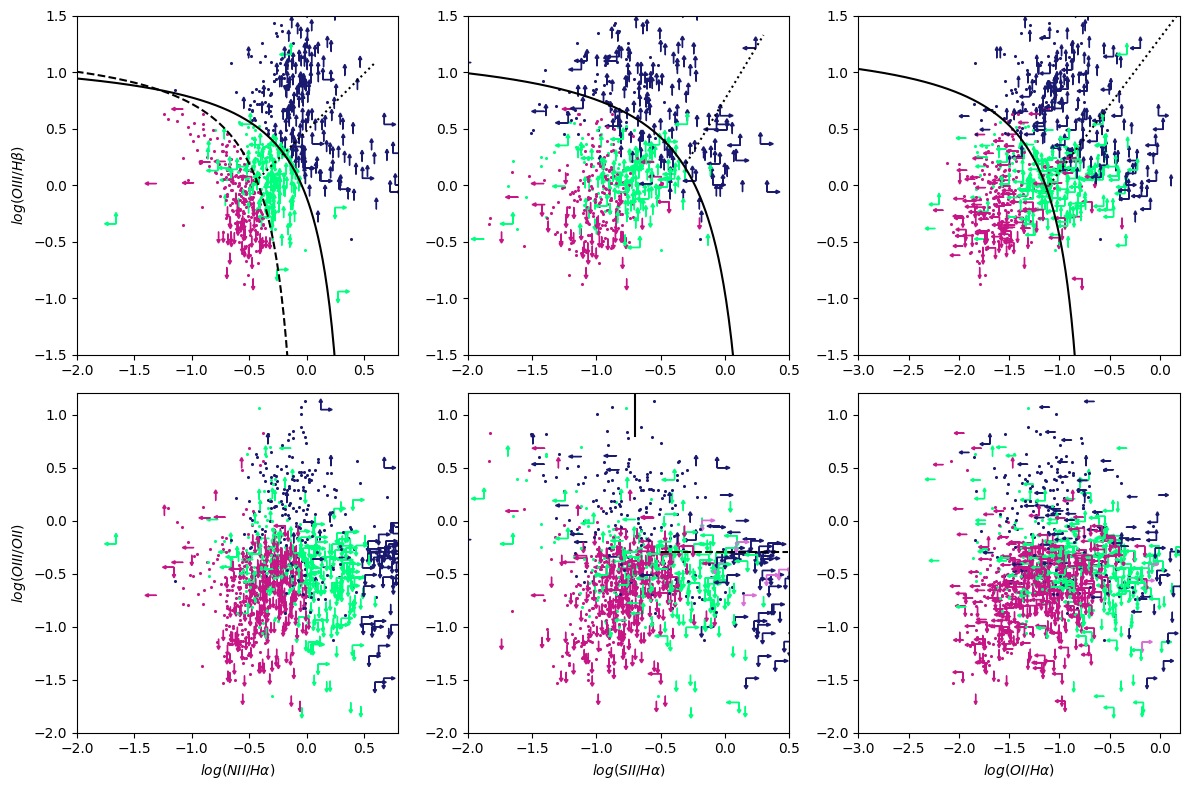

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8), tight_layout=True)
plt.subplots_adjust(wspace=0, hspace=0)

Y = []
PAIRS_Y = []
FLAGS_BPT = []
FLAGS_WHAN = []
#BPT standart 
ax1 = axs[0, 0]
ax1.set_xlim(-2, 0.8)
ax1.set_ylim(-1.5, 1.5)
X_1 = np.arange(-4, 0.4, 0.01)
X_111 = np.arange(-4, 0, 0.01)
X_11 = np.arange(-0.45, 0.6, 0.01)
ax1.plot(X_1, (0.61/(X_1 - 0.47)) + 1.19,
                      c='k')  # Kewley, 2001
ax1.plot(X_111, (0.61/(X_111 - 0.05)) + 1.3,
                      c='k', linestyle='dashed')  # Kauffman, 2003
            # https://adsabs.harvard.edu/full/2003MNRAS.346.1055K
ax1.plot(X_11, 1.01*X_11 + 0.48, c='k', linestyle='dotted')
ax1.set_ylabel(r'$log(OIII/H\beta)$')

ax2 = axs[1, 0]
ax2.set_xlim(-2, 0.8)
ax2.set_ylim(-2, 1.2)
ax2.set_xlabel(r'$log(NII/H\alpha)$')
ax2.set_ylabel(r'$log(OIII/OII)$')

#SII
ax3 = axs[0, 1]
ax3.set_xlim(-2, 0.5)
ax3.set_ylim(-1.5, 1.5)
X = np.arange(-2, 0.31, 0.01)
X_1 = np.arange(-0.3, 0.31, 0.01)
ax3.plot(X, 0.72/(X - 0.32) + 1.3, c = 'k')
ax3.plot(X_1, 1.89*X_1 + 0.76, c = 'k', linestyle='dotted')

ax4 = axs[1, 1]
ax4.set_xlim(-2, 0.5)
ax4.set_ylim(-2, 1.2)
X = np.arange(-0.5, 0.5, 0.01)
ax4.plot(X, X*0 - 0.3, c = 'k', linestyle='dashed')
ax4.plot([-0.7, -0.7], [0.8, 1.2], c = 'k')
ax4.set_xlabel(r'$log(SII/H\alpha)$')


#OI
ax5 = axs[0, 2]
ax5.set_xlim(-3, 0.2)
ax5.set_ylim(-1.5, 1.5)
X = np.arange(-3, -0.6, 0.01)
X_1 = np.arange(-1.1, 0.31, 0.01)
ax5.plot(X, 0.73/(X + 0.59) + 1.33, c = 'k')
ax5.plot(X_1, 1.18*X_1 + 1.3, c = 'k', linestyle='dotted')

ax6 = axs[1, 2]
ax6.set_xlim(-3, 0.2)
ax6.set_ylim(-2, 1.2)
ax6.set_xlabel(r'$log(OI/H\alpha)$')

radio_arr = np.loadtxt('radio_sources.txt')
radio_dict = {}

k = 0 
for i in range(len(CATAID)):
    if IS_BEST[i] == 'true' and IS_SBEST[i] == 'true' and (SURV[i] == 'SDSS' or SURV[i] == 'GAMA'):
        k += 1
        ha_ew, ha_ew_err, pair_HA = ew_proc(HA_EW[i], HA_EW_ERR[i])
        AGN, x, X_er, pair_x_flag, y, Y_er, pair_y_flag, SC_WHAN, x_S, x_S_er, pair_x_S_flag, x_O, x_O_er, pair_x_O_flag, y_OII, y_er_OII, pair_y_OII = AGN_reg(OIII[i], OIII_er[i], HB[i], HB_er[i], NII[i], NII_er[i], HA[i], HA_er[i], ha_ew, ha_ew_err, pair_HA, SII[i], SII_er[i], OI[i], OI_er[i], OII[i], OII_er[i])
        radio_flag = False
        alpha=1

        plotter_BPT(ax1, x, y, pair_x_flag, pair_y_flag, AGN, color_dict, radio_flag, alpha=alpha)
        plotter_BPT(ax2, x, y_OII, pair_x_flag, pair_y_OII, AGN, color_dict, radio_flag, alpha=alpha)
        plotter_BPT(ax3, x_S, y, pair_x_S_flag, pair_y_flag, AGN, color_dict, radio_flag, alpha=alpha)
        plotter_BPT(ax4, x_S, y_OII, pair_x_S_flag, pair_y_OII, AGN, color_dict, radio_flag, alpha=alpha)
        plotter_BPT(ax5, x_O, y, pair_x_O_flag, pair_y_flag, AGN, color_dict, radio_flag, alpha=alpha)
        plotter_BPT(ax6, x_O, y_OII, pair_x_O_flag, pair_y_OII, AGN, color_dict, radio_flag, alpha=alpha)

plt.savefig(r'E:\backup\backup_BPT\FIGURES\VO87.pdf')

C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_18092\304289715.py:61: UserWarning: loadtxt: input contained no data: "radio_sources.txt"
  radio_arr = np.loadtxt('radio_sources.txt')


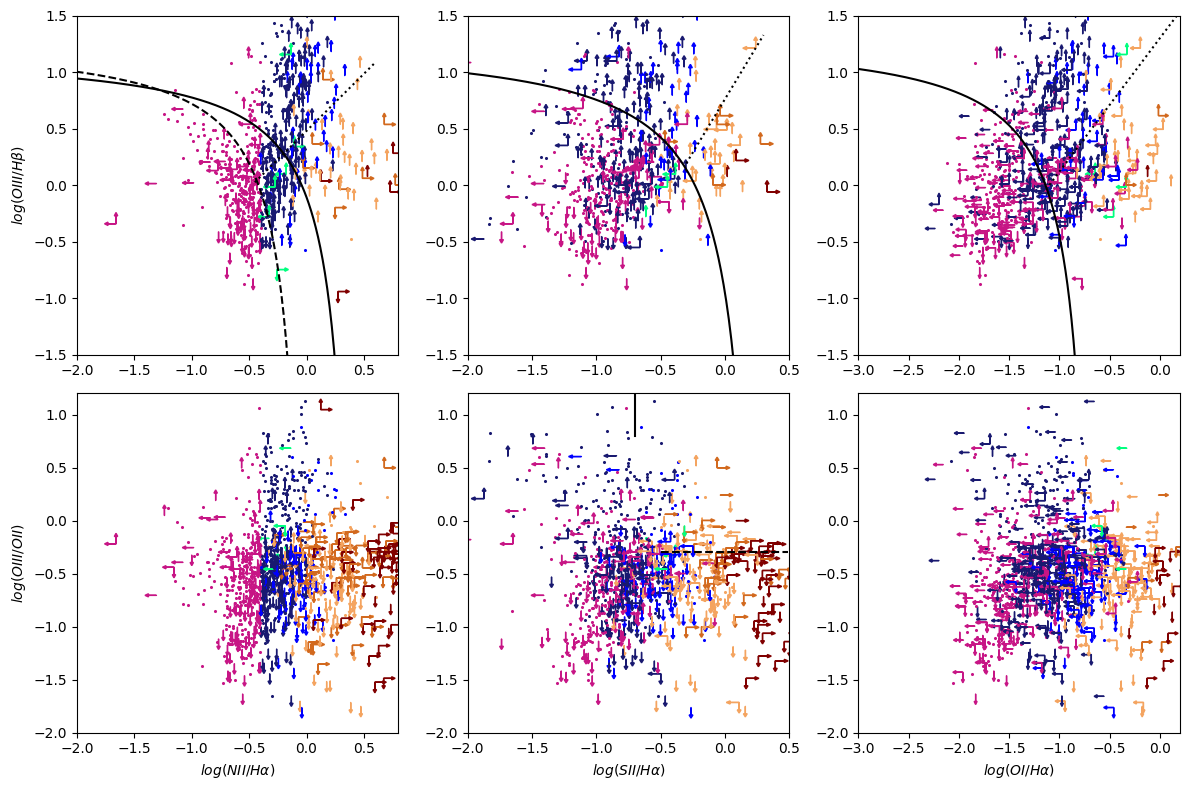

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8), tight_layout=True)
plt.subplots_adjust(wspace=0, hspace=0)

Y = []
PAIRS_Y = []
FLAGS_BPT = []
FLAGS_WHAN = []
#BPT standart 
ax1 = axs[0, 0]
ax1.set_xlim(-2, 0.8)
ax1.set_ylim(-1.5, 1.5)
X_1 = np.arange(-4, 0.4, 0.01)
X_111 = np.arange(-4, 0, 0.01)
X_11 = np.arange(-0.45, 0.6, 0.01)
ax1.plot(X_1, (0.61/(X_1 - 0.47)) + 1.19,
                      c='k')  # Kewley, 2001
ax1.plot(X_111, (0.61/(X_111 - 0.05)) + 1.3,
                      c='k', linestyle='dashed')  # Kauffman, 2003
            # https://adsabs.harvard.edu/full/2003MNRAS.346.1055K
ax1.plot(X_11, 1.01*X_11 + 0.48, c='k', linestyle='dotted')
ax1.set_ylabel(r'$log(OIII/H\beta)$')

ax2 = axs[1, 0]
ax2.set_xlim(-2, 0.8)
ax2.set_ylim(-2, 1.2)
ax2.set_xlabel(r'$log(NII/H\alpha)$')
ax2.set_ylabel(r'$log(OIII/OII)$')

#SII
ax3 = axs[0, 1]
ax3.set_xlim(-2, 0.5)
ax3.set_ylim(-1.5, 1.5)
X = np.arange(-2, 0.31, 0.01)
X_1 = np.arange(-0.3, 0.31, 0.01)
ax3.plot(X, 0.72/(X - 0.32) + 1.3, c = 'k')
ax3.plot(X_1, 1.89*X_1 + 0.76, c = 'k', linestyle='dotted')

ax4 = axs[1, 1]
ax4.set_xlim(-2, 0.5)
ax4.set_ylim(-2, 1.2)
X = np.arange(-0.5, 0.5, 0.01)
ax4.plot(X, X*0 - 0.3, c = 'k', linestyle='dashed')
ax4.plot([-0.7, -0.7], [0.8, 1.2], c = 'k')
ax4.set_xlabel(r'$log(SII/H\alpha)$')


#OI
ax5 = axs[0, 2]
ax5.set_xlim(-3, 0.2)
ax5.set_ylim(-1.5, 1.5)
X = np.arange(-3, -0.6, 0.01)
X_1 = np.arange(-1.1, 0.31, 0.01)
ax5.plot(X, 0.73/(X + 0.59) + 1.33, c = 'k')
ax5.plot(X_1, 1.18*X_1 + 1.3, c = 'k', linestyle='dotted')

ax6 = axs[1, 2]
ax6.set_xlim(-3, 0.2)
ax6.set_ylim(-2, 1.2)
ax6.set_xlabel(r'$log(OI/H\alpha)$')

radio_arr = np.loadtxt('radio_sources.txt')
radio_dict = {}

k = 0 
for i in range(len(CATAID)):
    if IS_BEST[i] == 'true' and IS_SBEST[i] == 'true' and (SURV[i] == 'SDSS' or SURV[i] == 'GAMA'):
        k += 1
        ha_ew, ha_ew_err, pair_HA = ew_proc(HA_EW[i], HA_EW_ERR[i])
        AGN, x, X_er, pair_x_flag, y, Y_er, pair_y_flag, SC_WHAN, x_S, x_S_er, pair_x_S_flag, x_O, x_O_er, pair_x_O_flag, y_OII, y_er_OII, pair_y_OII = AGN_reg(OIII[i], OIII_er[i], HB[i], HB_er[i], NII[i], NII_er[i], HA[i], HA_er[i], ha_ew, ha_ew_err, pair_HA, SII[i], SII_er[i], OI[i], OI_er[i], OII[i], OII_er[i])

        Y.append(y)
        PAIRS_Y.append(pair_y_flag)
        FLAGS_BPT.append(AGN)
        FLAGS_WHAN.append(SC_WHAN)

        radio_flag = False
        alpha=1

        plotter_BPT(ax1, x, y, pair_x_flag, pair_y_flag, SC_WHAN, cd_WHAN, radio_flag, alpha=alpha)
        plotter_BPT(ax2, x, y_OII, pair_x_flag, pair_y_OII, SC_WHAN, cd_WHAN, radio_flag, alpha=alpha)
        plotter_BPT(ax3, x_S, y, pair_x_S_flag, pair_y_flag, SC_WHAN, cd_WHAN, radio_flag, alpha=alpha)
        plotter_BPT(ax4, x_S, y_OII, pair_x_S_flag, pair_y_OII, SC_WHAN, cd_WHAN, radio_flag, alpha=alpha)
        plotter_BPT(ax5, x_O, y, pair_x_O_flag, pair_y_flag, SC_WHAN, cd_WHAN, radio_flag, alpha=alpha)
        plotter_BPT(ax6, x_O, y_OII, pair_x_O_flag, pair_y_OII, SC_WHAN, cd_WHAN, radio_flag, alpha=alpha)

AGN [0, 6, 23, 53, 31, 6] 119
AGNX [0, 3, 9, 27, 78, 25] 142
AGNY [0, 0, 0, 0, 0, 0] 0
UNC [1, 5, 13, 17, 14, 0] 50
UNCX [0, 3, 33, 139, 187, 20] 382
UNCY [1, 0, 0, 3, 0, 0] 4
SF [6, 6, 9, 17, 2, 0] 40
SFX [3, 10, 46, 101, 29, 6] 195
SFY [0, 0, 0, 4, 0, 0] 4
NOEL [3, 3, 35, 138, 173, 10] 362
NDA [0, 0, 0, 0, 0, 0] 0
TOT [14, 36, 168, 499, 514, 67] 1298


AGN [15, 27, 40, 26, 7, 0] 115
AGNX [1, 0, 2, 6, 1, 0] 10
AGNY [0, 0, 0, 0, 0, 0] 0
UNC [22, 24, 60, 28, 4, 0] 138
UNCX [3, 2, 11, 22, 1, 0] 39
UNCY [0, 3, 1, 0, 0, 0] 4
SF [67, 67, 63, 17, 3, 0] 217
SFX [16, 21, 75, 43, 2, 0] 157
SFY [0, 0, 0, 0, 0, 0] 0
NOEL [2, 1, 7, 6, 1, 0] 17
NDA [0, 0, 0, 0, 0, 0] 0
TOT [126, 145, 259, 148, 19, 0] 697


AGN [15, 33, 63, 79, 38, 6] 234
AGNX [1, 3, 11, 33, 79, 25] 152
AGNY [0, 0, 0, 0, 0, 0] 0
UNC [23, 29, 73, 45, 18, 0] 188
UNCX [3, 5, 44, 161, 188, 20] 421
UNCY [1, 3, 1, 3, 0, 0] 8
SF [73, 73, 72, 34, 5, 0] 257
SFX [19, 31, 121, 144, 31, 6] 352
SFY [0, 0, 0, 4, 0, 0] 4
NOEL [5, 4, 42, 144, 174, 

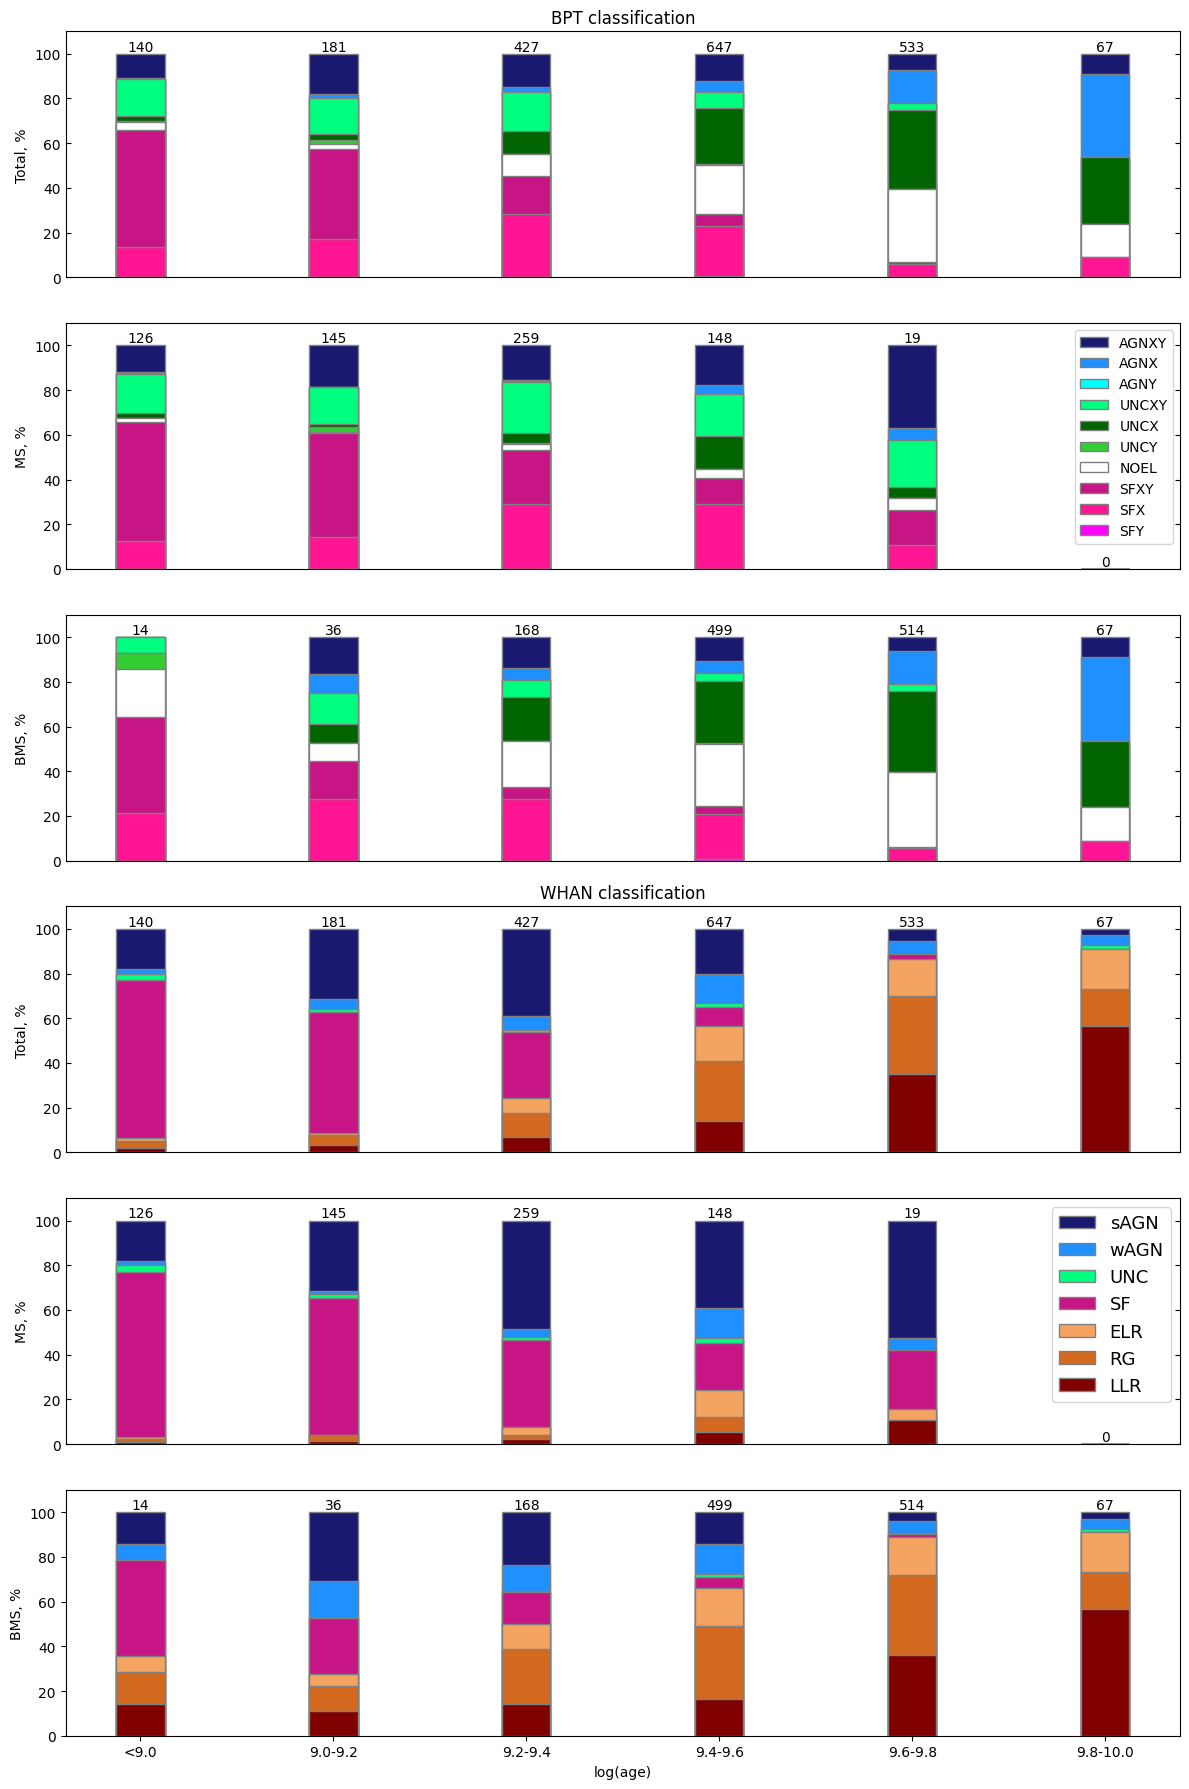

In [ ]:
fig, axs = plt.subplots(6, 1, figsize=(12, 18), tight_layout=True)
plt.subplots_adjust(wspace=0, hspace=0)
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]
ax4 = axs[3]
ax5 = axs[4]
ax6 = axs[5]
plotter_histo_BPT(ax3, [0], age, FLAGS_BPT, 'BMS, %', BMS)

plotter_histo_BPT(ax2, [1], age, FLAGS_BPT, 'MS, %', BMS)

plotter_histo_BPT(ax1, [0, 1], age, FLAGS_BPT, 'Total, %', BMS)

plotter_histo_WHAN(ax6, [0], age, FLAGS_WHAN, 'BMS, %', BMS)

plotter_histo_WHAN(ax5, [1], age, FLAGS_WHAN, 'MS, %', BMS)

plotter_histo_WHAN(ax4, [0,1], age, FLAGS_WHAN, 'Total, %', BMS)

ax2.legend(fontsize="10")
ax5.legend(fontsize="13")

top_axes = [ax2, ax3, ax5]
for item in top_axes:
    item.tick_params(top=False, labeltop=False, bottom=False, labelbottom=False, right=True, direction='in')

ax1.tick_params(top=False, labeltop=False, bottom=False, labelbottom=False, right=True, direction='in')
#ax1.xaxis.set_label_position('top')
ax1.set_title('BPT classification')
ax4.tick_params(top=False, labeltop=False, bottom=False, labelbottom=False, right=True, direction='in')
#ax4.xaxis.set_label_position('top')
ax4.set_title('WHAN classification')

ax6.set_xlabel('log(age)')
ax6.set_xticks([r for r in range(6)], ['<9.0', '9.0-9.2', '9.2-9.4', '9.4-9.6', '9.6-9.8', '9.8-10.0'])

plt.savefig(r'E:\backup\backup_BPT\FIGURES\AGE_SNAPSHOTS.pdf')

In [ ]:
def plotter_histo_WHAN(axes, BMS_condition, age, SC_WHAN, y_name, BMS):
    SF = [0, 0, 0, 0, 0, 0]
    wAGN = [0, 0, 0, 0, 0, 0]
    sAGN = [0, 0, 0, 0, 0, 0]
    NOEL = [0, 0, 0, 0, 0, 0]
    ELR = [0, 0, 0, 0, 0, 0]
    LLR = [0, 0, 0, 0, 0, 0]
    RG = [0, 0, 0, 0, 0, 0]
    NDA = [0, 0, 0, 0, 0, 0]
    SAMPLE = [0, 0, 0, 0, 0, 0]

    SF_perc = [0, 0, 0, 0, 0, 0]
    wAGN_perc = [0, 0, 0, 0, 0, 0]
    sAGN_perc = [0, 0, 0, 0, 0, 0]
    NOEL_perc = [0, 0, 0, 0, 0, 0]
    ELR_perc = [0, 0, 0, 0, 0, 0]
    LLR_perc = [0, 0, 0, 0, 0, 0]
    RG_perc = [0, 0, 0, 0, 0, 0]
    NDA_perc = [0, 0, 0, 0, 0, 0]

    ages = [[0, 0.05], [0.05, 0.1], [0.1, 0.15], [0.15, 0.2], [0.2, 0.25], [0.25, 0.33]]
    for i in range(len(ages)):
        for j in range(len(age)):
            if age[j] > ages[i][0] and age[j] <= ages[i][1] and int(BMS[j]) in BMS_condition: #below-MS=0 / MS galaxies=1 and item['BMS'] == 1:
                SAMPLE[i] += 1
                if SC_WHAN[j] == 'SF':
                    SF[i] += 1
                elif SC_WHAN[j] == 'wAGN':
                    wAGN[i] += 1
                elif SC_WHAN[j] == 'sAGN':
                    sAGN[i] += 1
                elif SC_WHAN[j] == 'UNC':
                    NOEL[i] += 1
                elif SC_WHAN[j] == 'ELR':
                    ELR[i] += 1
                elif SC_WHAN[j] == 'LLR':
                    LLR[i] += 1
                elif SC_WHAN[j] == 'RG':
                    RG[i] += 1
                elif SC_WHAN[j] in ['NDA', 'NDA0', 'NDA1']:
                    #NDA[i] += 1
                    SAMPLE[i] -= 1
        
    print(SAMPLE)
            
    for j in range(len(SAMPLE)):
        try:
            LLR_perc[j] = (LLR[j]/SAMPLE[j])*100
            RG_perc[j] = ((LLR[j] + RG[j])/SAMPLE[j])*100
            ELR_perc[j] = (LLR[j] + RG[j] + ELR[j])*100/SAMPLE[j]
            SF_perc[j] = (LLR[j] + RG[j] + ELR[j]+SF[j])*100/SAMPLE[j]
            NDA_perc[j] = (NDA[j] + RG[j] + LLR[j] + ELR[j]+SF[j])*100/SAMPLE[j]
            NOEL_perc[j] = (NDA[j] + RG[j] + LLR[j] + ELR[j]+SF[j]+NOEL[j])*100/SAMPLE[j]
            wAGN_perc[j] = (NDA[j] + RG[j] + LLR[j] + ELR[j]+SF[j]+NOEL[j] + wAGN[j])*100/SAMPLE[j]
            sAGN_perc[j] = (NDA[j] + RG[j] + LLR[j] + ELR[j]+SF[j]+NOEL[j] + wAGN[j] + sAGN[j])*100/SAMPLE[j]
        except:
            pass
    
    barWidth = 0.25
    br1 = np.arange(len(SAMPLE))
 
        # Make the plot
    bar1 = axes.bar(br1, sAGN_perc, color ='midnightblue', width = barWidth,
    edgecolor ='grey', label ='sAGN')
    axes.bar(br1, wAGN_perc, color ='dodgerblue', width = barWidth, edgecolor ='grey', label ='wAGN')
    axes.bar(br1, NOEL_perc, color ='springgreen', width = barWidth, edgecolor ='grey', label ='UNC')
    axes.bar(br1, SF_perc, color ='mediumvioletred', width = barWidth, edgecolor ='grey', label ='SF')
    axes.bar(br1, ELR_perc, color ='sandybrown', width = barWidth, edgecolor ='grey', label ='ELR')
    axes.bar(br1, RG_perc, color ='chocolate', width = barWidth, edgecolor ='grey', label ='RG')
    axes.bar(br1, LLR_perc, color ='maroon', width = barWidth, edgecolor ='grey', label ='LLR')
 
        # Adding Xticks

    axes.set_ylabel(f'{y_name}')
    axes.set_ylim(0, 110)

    k = 0
    for rect in bar1:
        height = rect.get_height()
        axes.text(rect.get_x() + rect.get_width() / 2.0, height, str(SAMPLE[k]), ha='center', va='bottom')
        k+=1
    all = [sAGN, wAGN, NOEL, SF, ELR, RG, LLR, SAMPLE]

    for group in all:
        for i, item in enumerate(group):
            print('${}$ & '.format(item), end='')
        print(sum(group), r' \\')

    print('\n')

def plotter_histo_BPT(axes, BMS_condition, age, SC_BPT, y_name, BMS):
        UNC = [0, 0, 0, 0, 0, 0]
        UNCX = [0, 0, 0, 0, 0, 0]
        UNCY = [0, 0, 0, 0, 0, 0]
        SF = [0, 0, 0, 0, 0, 0]
        SFX = [0, 0, 0, 0, 0, 0]
        SFY = [0, 0, 0, 0, 0, 0]
        AGN = [0, 0, 0, 0, 0, 0]
        AGNX = [0, 0, 0, 0, 0, 0]
        AGNY = [0, 0, 0, 0, 0, 0]
        NOEL = [0, 0, 0, 0, 0, 0]
        NDA = [0, 0, 0, 0, 0, 0]
        SAMPLE = [0, 0, 0, 0, 0, 0]
        UNC_perc = [0, 0, 0, 0, 0, 0]
        UNCX_perc = [0, 0, 0, 0, 0, 0]
        UNCY_perc = [0, 0, 0, 0, 0, 0]
        SF_perc = [0, 0, 0, 0, 0, 0]
        SFX_perc = [0, 0, 0, 0, 0, 0]
        SFY_perc = [0, 0, 0, 0, 0, 0]
        AGN_perc = [0, 0, 0, 0, 0, 0]
        AGNX_perc = [0, 0, 0, 0, 0, 0]
        AGNY_perc = [0, 0, 0, 0, 0, 0]
        NOEL_perc = [0, 0, 0, 0, 0, 0]
        NDA_perc = [0, 0, 0, 0, 0, 0]

        ages = [[0, 0.05], [0.05, 0.1], [0.1, 0.15], [0.15, 0.2], [0.2, 0.25], [0.25, 0.33]]
        for i in range(len(ages)):
            for j in range(len(age)):
                if age[j] > ages[i][0] and age[j] <= ages[i][1] and BMS[j] in BMS_condition: #below-MS=0 / MS galaxies=1 and item['BMS'] == 1:
                    SAMPLE[i] += 1
                    if SC_BPT[j] == 'SFXY':
                        SF[i] += 1
                    elif SC_BPT[j] == 'SFX':
                        SFX[i] += 1
                    elif SC_BPT[j] == 'SFY':
                        SFY[i] += 1
                    elif SC_BPT[j] == 'NOEL':
                        NOEL[i] += 1
                    elif SC_BPT[j] == 'AGNXY':
                        AGN[i] += 1
                    elif SC_BPT[j] == 'AGNX':
                        AGNX[i] += 1
                    elif SC_BPT[j] == 'AGNY':
                        AGNY[i] += 1
                    elif SC_BPT[j] == 'UNCXY':
                        UNC[i] += 1
                    elif SC_BPT[j] == 'UNCX':
                        UNCX[i] += 1
                    elif SC_BPT[j] == 'UNCY':
                        UNCY[i] += 1
                    elif SC_BPT[j] == 'NDA':
                        #NDA[i] += 1
                        SAMPLE[i] -= 1
        
        for j in range(len(SAMPLE)):
            try:
                SFY_perc[j] = (SFY[j]/SAMPLE[j])*100
                SFX_perc[j] = (SFY[j] + SFX[j])*100/SAMPLE[j]
                SF_perc[j] = (SFY[j] + SFX[j]+SF[j])*100/SAMPLE[j]
                NDA_perc[j] = (NDA[j] + SFY[j] + SFX[j]+SF[j])*100/SAMPLE[j]
                NOEL_perc[j] = (NDA[j] + SFY[j] + SFX[j]+SF[j]+NOEL[j])*100/SAMPLE[j]
                UNCY_perc[j] = (NDA[j] + SFY[j] + SFX[j]+SF[j]+NOEL[j] + UNCY[j])*100/SAMPLE[j]
                UNCX_perc[j] = UNCY_perc[j] + (UNCX[j]/SAMPLE[j])*100
                UNC_perc[j] = UNCX_perc[j] + (UNC[j]/SAMPLE[j])*100
                
                AGNY_perc[j] = UNC_perc[j] + (AGNY[j]/SAMPLE[j])*100
                AGNX_perc[j] = AGNY_perc[j] + (AGNX[j]/SAMPLE[j])*100
                AGN_perc[j] = AGNX_perc[j] + (AGN[j]/SAMPLE[j])*100
                
            except:
                pass

        print('AGN', AGN, sum(AGN)) 
        print('AGNX', AGNX, sum(AGNX))
        print('AGNY', AGNY, sum(AGNY))
        print('UNC', UNC, sum(UNC))
        print('UNCX', UNCX, sum(UNCX))
        print('UNCY', UNCY, sum(UNCY))
        print('SF', SF, sum(SF))
        print('SFX', SFX, sum(SFX))
        print('SFY', SFY, sum(SFY))
        print('NOEL', NOEL, sum(NOEL))
        print('NDA', NDA, sum(NDA))
        print('TOT', SAMPLE, sum(SAMPLE))

        print("\n")

        barWidth = 0.25
        br1 = np.arange(len(SAMPLE))
 
        # Make the plot
        bar1 = axes.bar(br1, AGN_perc, color ='midnightblue', width = barWidth,
        edgecolor ='grey', label ='AGNXY')
        axes.bar(br1, AGNX_perc, color ='dodgerblue', width = barWidth, edgecolor ='grey', label ='AGNX')
        axes.bar(br1, AGNY_perc, color ='aqua', width = barWidth, edgecolor ='grey', label ='AGNY')
        axes.bar(br1, UNC_perc, color ='springgreen', width = barWidth, edgecolor ='grey', label ='UNCXY')
        axes.bar(br1, UNCX_perc, color ='darkgreen', width = barWidth, edgecolor ='grey', label ='UNCX')
        axes.bar(br1, UNCY_perc, color ='limegreen', width = barWidth, edgecolor ='grey', label ='UNCY')
        axes.bar(br1, NOEL_perc, color ='white', width = barWidth, edgecolor ='grey', label ='NOEL')
        axes.bar(br1, SF_perc, color ='mediumvioletred', width = barWidth, edgecolor ='grey', label ='SFXY')
        axes.bar(br1, SFX_perc, color ='deeppink', width = barWidth, edgecolor ='grey', label ='SFX')
        axes.bar(br1, SFY_perc, color ='fuchsia', width = barWidth, edgecolor ='grey', label ='SFY')
        
        axes.set_ylabel(f'{y_name}')
        axes.set_ylim(0, 110)
        
        # Adding Xticks

        k = 0
        for rect in bar1:
            height = rect.get_height()
            axes.text(rect.get_x() + rect.get_width() / 2.0, height, str(SAMPLE[k]), ha='center', va='bottom')
            k+=1

AGN [8, 18, 27, 25, 19, 22] 119
AGNX [15, 37, 36, 28, 10, 16] 142
AGNY [0, 0, 0, 0, 0, 0] 0
UNC [1, 4, 10, 14, 9, 12] 50
UNCX [11, 46, 81, 100, 58, 86] 382
UNCY [0, 0, 1, 1, 1, 1] 4
SF [5, 10, 8, 7, 3, 7] 40
SFX [10, 16, 40, 44, 34, 51] 195
SFY [0, 0, 2, 1, 0, 1] 4
NOEL [2, 7, 45, 69, 85, 154] 362
NDA [0, 0, 0, 0, 0, 0] 0
TOT [52, 138, 250, 289, 219, 350] 1298


AGN [1, 18, 20, 19, 24, 33] 115
AGNX [1, 5, 3, 0, 1, 0] 10
AGNY [0, 0, 0, 0, 0, 0] 0
UNC [1, 20, 24, 18, 24, 51] 138
UNCX [1, 5, 15, 5, 5, 8] 39
UNCY [0, 0, 0, 0, 2, 2] 4
SF [16, 26, 45, 44, 34, 52] 217
SFX [2, 12, 37, 38, 22, 46] 157
SFY [0, 0, 0, 0, 0, 0] 0
NOEL [0, 1, 5, 2, 1, 8] 17
NDA [0, 0, 0, 0, 0, 0] 0
TOT [22, 87, 149, 126, 113, 200] 697


AGN [9, 36, 47, 44, 43, 55] 234
AGNX [16, 42, 39, 28, 11, 16] 152
AGNY [0, 0, 0, 0, 0, 0] 0
UNC [2, 24, 34, 32, 33, 63] 188
UNCX [12, 51, 96, 105, 63, 94] 421
UNCY [0, 0, 1, 1, 3, 3] 8
SF [21, 36, 53, 51, 37, 59] 257
SFX [12, 28, 77, 82, 56, 97] 352
SFY [0, 0, 2, 1, 0, 1] 4
NOEL [2, 

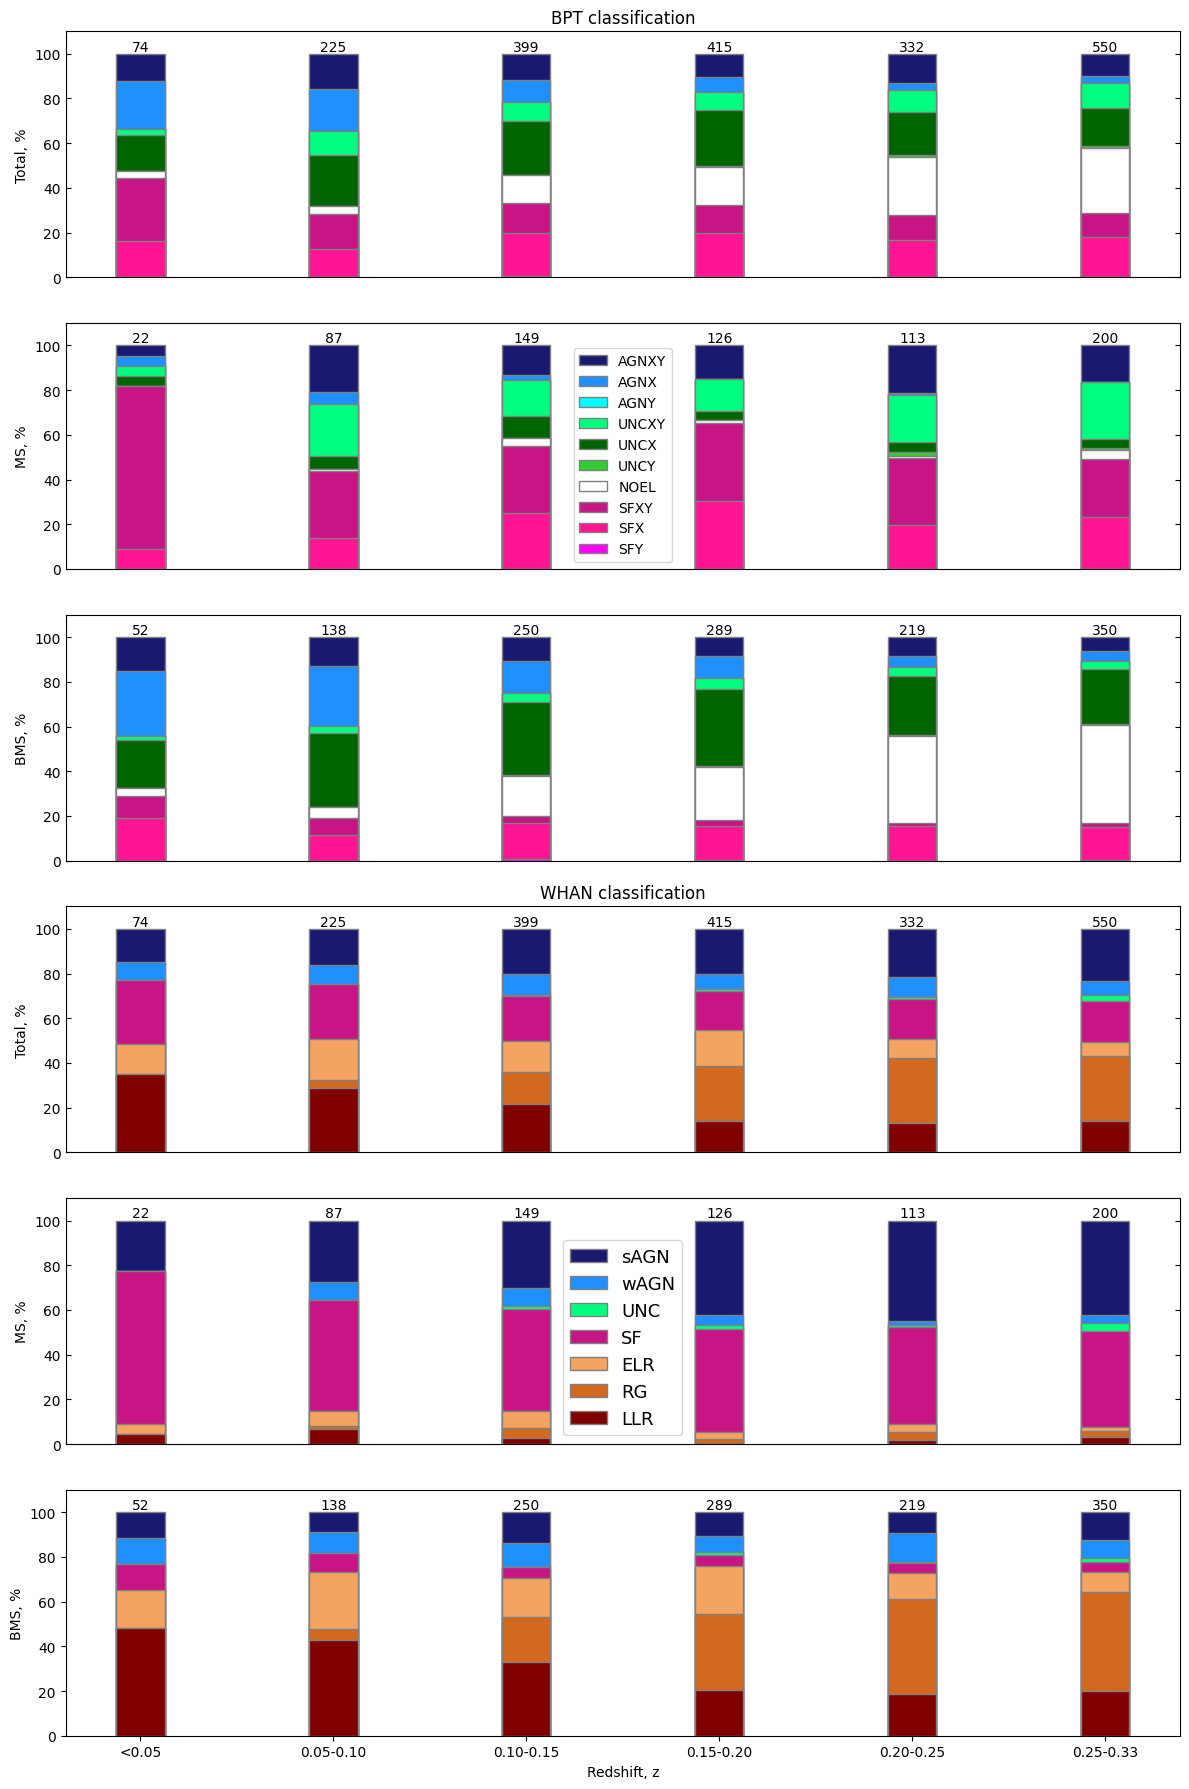